<h1 align="center"> Loan_Status Prediction</h1>

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
total_data = pd.concat([train,test],axis=0,keys=['train','test'])

In [8]:
# train = total_data[:data.shape[0]]
# test = total_data[data.shape[0]:]

In [9]:
total_data

Loan_ID Gender Married Dependents     Education Self_Employed  \
train 0    LP001002   Male      No          0      Graduate            No   
      1    LP001003   Male     Yes          1      Graduate            No   
      2    LP001005   Male     Yes          0      Graduate           Yes   
      3    LP001006   Male     Yes          0  Not Graduate            No   
      4    LP001008   Male      No          0      Graduate            No   
...             ...    ...     ...        ...           ...           ...   
test  362  LP002971   Male     Yes         3+  Not Graduate           Yes   
      363  LP002975   Male     Yes          0      Graduate            No   
      364  LP002980   Male      No          0      Graduate            No   
      365  LP002986   Male     Yes          0      Graduate            No   
      366  LP002989   Male      No          0      Graduate           Yes   

           ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
train 0               5849                0.0         NaN             360.0   
      1               4583             1508.0       128.0             360.0   
      2               3000                0.0        66.0             360.0   
      3               2583             2358.0       120.0             360.0   
      4               6000                0.0       141.0             360.0   
...                    ...                ...         ...               ...   
test  362             4009             1777.0       113.0             360.0   
      363             4158              709.0       115.0             360.0   
      364             3250             1993.0       126.0             360.0   
      365             5000             2393.0       158.0             360.0   
      366             9200                0.0        98.0             180.0   

           Credit_History Property_Area Loan_Status  
train 0               1.0         Urban           Y  
      1               1.0         Rural           N  
      2               1.0         Urban           Y  
      3               1.0         Urban           Y  
      4               1.0         Urban           Y  
...                   ...           ...         ...  
test  362             1.0         Urban         NaN  
      363             1.0         Urban         NaN  
      364             NaN     Semiurban         NaN  
      365             1.0         Rural         NaN  
      366             1.0         Rural         NaN  

[981 rows x 13 columns]

<h2 align="center"> Data PreProcessing </h2>

In [10]:
total_data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [11]:
total_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Gender 

In [12]:
total_data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
total_data['Gender']=total_data['Gender'].map({'Male':1,'Female':0})

In [14]:
total_data['Gender'].fillna(-1,inplace=True)

In [15]:
total_data['Gender'].unique()

array([ 1.,  0., -1.])

### Married

there are only 3 missing values in Married column

In [16]:
total_data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
total_data['Married'].fillna('Yes',inplace=True)

In [18]:
total_data['Married']=total_data['Married'].map({'Yes':1,'No':0})

### Dependents

In [19]:
total_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [20]:
print("Null values in train set : ",train['Dependents'].isnull().sum())
print("Null values in train set : ",test['Dependents'].isnull().sum())

Null values in train set :  15
Null values in train set :  10


In [21]:
total_data['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

- dependents value is having 0 as mode with 545 observations
- we can fill 0 with null values

In [22]:
total_data['Dependents'].replace('3+','3',inplace=True)
total_data['Dependents'].fillna(0,inplace=True)

In [23]:
total_data['Dependents']=total_data['Dependents'].astype(int)

In [24]:
#to mention the NA values of dependents column
#total_data['Dependents_NA'] = total_data['Dependents'].isnull().astype(int)

### Education

Education doesnt have missing values

In [25]:
total_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [26]:
total_data['Education']=total_data['Education'].map({'Graduate':1, 'Not Graduate':0})

### Self_Employed

In [27]:
total_data['Self_Employed'].isna().sum()

55

In [28]:
total_data['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

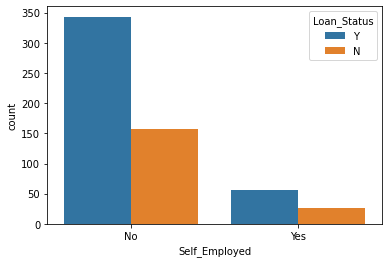

In [29]:
sns.countplot(x='Self_Employed',data=train,hue='Loan_Status')

In [30]:
total_data['Self_Employed'].fillna('No',inplace=True)

In [31]:
total_data['Self_Employed']=total_data['Self_Employed'].map({'Yes':1,'No':0})

### Income columns

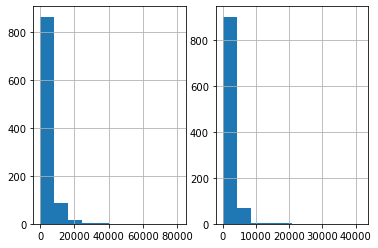

In [32]:
plt.subplot(1,2,1)
total_data['ApplicantIncome'].hist()
plt.subplot(1,2,2)
total_data['CoapplicantIncome'].hist()

Create a new Column as Total_Income that is sum of Applicant and CoApplicant Income

In [33]:
total_data['Total_Income'] = total_data['ApplicantIncome']+total_data['CoapplicantIncome']

Create a new columns that tells income level

In [34]:
groups = ['very_low','low','medium','high','very_high']
bins = [0,10000.0,20000.0,30000.0,60000.0,81000.0]
total_data['Income_Level'] = pd.cut(total_data['Total_Income'],bins =bins  ,labels = groups )

In [35]:
total_data[['Total_Income','Income_Level']].head()

Total_Income Income_Level
train 0        5849.0     very_low
      1        6091.0     very_low
      2        3000.0     very_low
      3        4941.0     very_low
      4        6000.0     very_low

### Loan Amount

In [36]:
Loanmeans= total_data.groupby('Income_Level').mean()['LoanAmount']

In [37]:
Loanmeans

Income_Level
very_low     127.000000
low          236.448276
medium       303.066667
high         352.750000
very_high    403.333333
Name: LoanAmount, dtype: float64

Now replace Null values in the LoanAmount column by above means since LoanAmount may vary with Income level

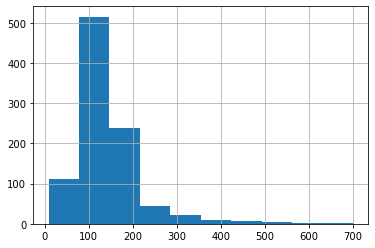

In [38]:
total_data['LoanAmount'].hist()

In [39]:
for level in Loanmeans.index:
    total_data.loc[(total_data['LoanAmount'].isna()) & (total_data['Income_Level']==level),'LoanAmount']=Loanmeans[level]

In [174]:
# total_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [62]:
total_data.drop('Total_Income',axis=1,inplace=True)

**Encoding Income Level**

In [63]:
total_data['Income_Level'].dtype

dtype('int64')

In [64]:
total_data['Income_Level']=total_data['Income_Level'].map({'very_low':1,'low':2,'medium':3,'high':4,'very_high':5})

In [65]:
total_data['Income_Level']=pd.to_numeric(total_data['Income_Level'])

### Loan_Amount_Term

In [66]:
total_data['Loan_Amount_Term'].isna().sum()

0

In [67]:
total_data['Loan_Amount_Term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [68]:
total_data['Loan_Amount_Term'].fillna(360.0,inplace=True)

### Credit_History

In [46]:
total_data[total_data['Credit_History'].isna()]['Loan_Status'].value_counts()

Y    37
N    13
Name: Loan_Status, dtype: int64

In [47]:
total_data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

1 Represents they pay loans well on basis of their last payments and 0 means vice versa

In [48]:
total_data['Credit_History'].fillna(0.5,inplace=True)

### Property_Area

In [49]:
total_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

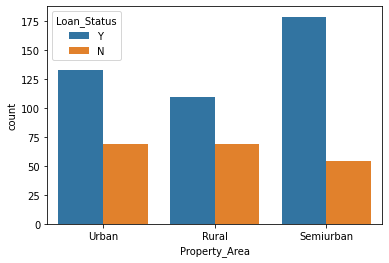

In [50]:
sns.countplot(data=train,x='Property_Area',hue='Loan_Status')

In [51]:
#One hot encoding
dummies = pd.get_dummies(total_data['Property_Area'],prefix = 'Prop_Area',drop_first=True)

In [52]:
total_data=pd.concat([total_data,dummies],axis=1)

In [53]:
total_data.drop('Property_Area',axis=1,inplace=True)

In [54]:
# total_data['Property_Area']=total_data['Property_Area'].map({'Urban':2, 'Rural':1, 'Semiurban':3})

## After Cleaning

In [55]:
total_data.drop(['Loan_ID'],axis=1,inplace=True)

In [56]:
total_data.head()

Gender  Married  Dependents  Education  Self_Employed  \
train 0     1.0        0           0          1              0   
      1     1.0        1           1          1              0   
      2     1.0        1           0          1              1   
      3     1.0        1           0          0              0   
      4     1.0        0           0          1              0   

         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
train 0             5849                0.0       127.0             360.0   
      1             4583             1508.0       128.0             360.0   
      2             3000                0.0        66.0             360.0   
      3             2583             2358.0       120.0             360.0   
      4             6000                0.0       141.0             360.0   

         Credit_History Loan_Status  Total_Income  Income_Level  \
train 0             1.0           Y        5849.0             1   
      1             1.0           N        6091.0             1   
      2             1.0           Y        3000.0             1   
      3             1.0           Y        4941.0             1   
      4             1.0           Y        6000.0             1   

         Prop_Area_Semiurban  Prop_Area_Urban  
train 0                    0                1  
      1                    0                0  
      2                    0                1  
      3                    0                1  
      4                    0                1

In [57]:
total_data.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Loan_Status            367
Total_Income             0
Income_Level             0
Prop_Area_Semiurban      0
Prop_Area_Urban          0
dtype: int64

In [58]:
total_data.dtypes

Gender                 float64
Married                  int64
Dependents               int32
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Loan_Status             object
Total_Income           float64
Income_Level             int64
Prop_Area_Semiurban      uint8
Prop_Area_Urban          uint8
dtype: object

In [59]:
total_data.dtypes

Gender                 float64
Married                  int64
Dependents               int32
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Loan_Status             object
Total_Income           float64
Income_Level             int64
Prop_Area_Semiurban      uint8
Prop_Area_Urban          uint8
dtype: object

In [60]:
total_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Income_Level,Prop_Area_Semiurban,Prop_Area_Urban
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.765545,0.646279,0.767584,0.777778,0.121305,5179.795107,1601.916330,142.710357,342.564730,0.808869,6781.711437,1.162080,0.355759,0.348624
std,0.478172,0.478368,1.030657,0.415952,0.326648,5695.104533,2718.772806,76.789743,64.482011,0.366885,6023.952550,0.504297,0.478987,0.476778
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,1442.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.000000,360.000000,1.000000,4166.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3800.000000,1110.000000,127.000000,360.000000,1.000000,5314.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000,7308.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000,5.000000,1.000000,1.000000


### Outlier Handling

Text(0.5, 1.0, 'Total_Income')

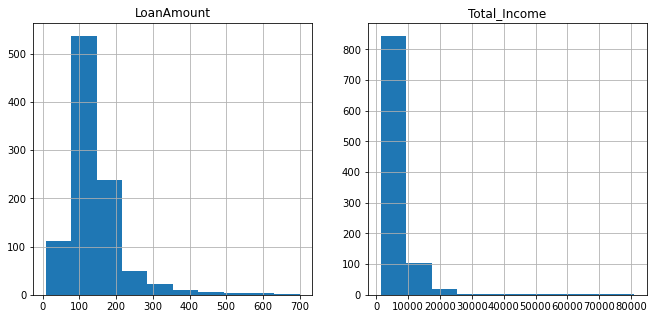

In [200]:
num_features = ['LoanAmount','Total_Income']

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
total_data[num_features[0]].hist()
plt.title(num_features[0])
plt.subplot(1,2,2)
total_data[num_features[1]].hist()
plt.title(num_features[1])

C:\Users\Sathish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sathish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sathish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CoapplicantIncome')

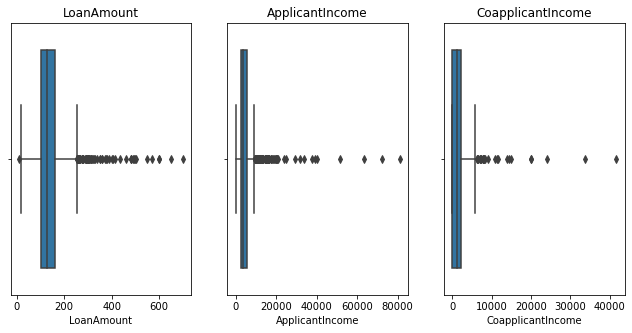

In [70]:
num_features = ['LoanAmount','ApplicantIncome','CoapplicantIncome']

plt.figure(figsize=(11,5))
plt.subplot(1,3,1)
sns.boxplot(total_data[num_features[0]])
plt.title(num_features[0])

plt.subplot(1,3,2)
sns.boxplot(total_data[num_features[1]])
plt.title(num_features[1])

plt.subplot(1,3,3)
sns.boxplot(total_data[num_features[2]])
plt.title(num_features[2])

Text(0.5, 1.0, 'Total_Income')

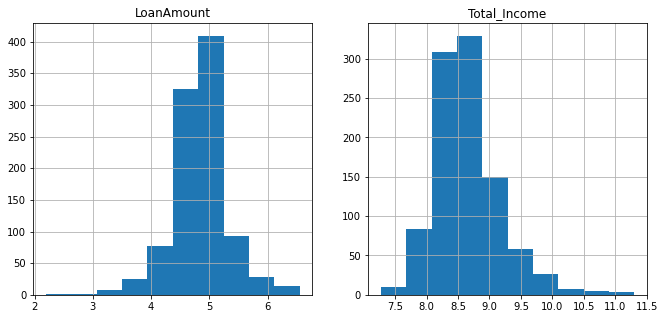

In [202]:
num_features = ['LoanAmount','ApplicantIncome','CoapplicantIncome']

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
np.log(total_data[num_features[0]]).hist()
plt.title(num_features[0])
plt.subplot(1,2,2)
np.log(total_data[num_features[1]]).hist()
plt.title(num_features[1])

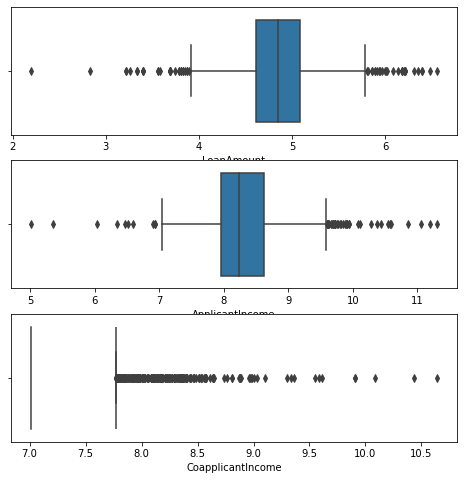

In [82]:
num_features = ['LoanAmount','ApplicantIncome','CoapplicantIncome']

plt.figure(figsize=(8,8))
for i,var in enumerate(num_features):
    plt.subplot(3,1,i+1)
    sns.boxplot(np.log(total_data[var]))
    #plt.title(var)
    

there are still outliers int the data after log transformation

Loan Amount has outliers below 3.8 and above 5.8

total Income has outliers below 7.5 and above 9.8

In [204]:
total_data['LoanAmount']=np.log(total_data['LoanAmount'])
total_data['ApplicantIncome']=np.log(total_data['ApplicantIncome'])
total_data['CoapplicantIncome']=np.log(total_data['CoapplicantIncome'])

In [206]:
def whiskersLA(x):
    if x<3.8:
        return 3.8
    elif x>5.8:
        return 5.8
    else:
        return x

def whiskersAI(x):
    if x<7.5:
        return 7.5
    elif x>9.8:
        return 9.8
    else:
        return x
    

def whiskersCI(x):
    if x<7.5:
        return 7.5
    elif x>9.8:
        return 9.8
    else:
        return x

In [208]:
total_data['LoanAmount']=total_data['LoanAmount'].apply(whiskersLA)
total_data['Total_Income']=total_data['Total_Income'].apply(whiskersTI)

In [209]:
total_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Income_Level,Prop_Area_Semiurban,Prop_Area_Urban
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.765545,0.646279,0.767584,0.777778,0.121305,4.848517,342.564730,0.824975,8.635234,1.162080,0.355759,0.348624
std,0.478172,0.478368,1.030657,0.415952,0.326648,0.422390,64.482011,0.357226,0.472733,0.504297,0.478987,0.476778
min,-1.000000,0.000000,0.000000,0.000000,0.000000,3.800000,6.000000,0.000000,7.500000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,4.615121,360.000000,1.000000,8.334712,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,4.844187,360.000000,1.000000,8.578100,1.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5.087596,360.000000,1.000000,8.896725,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,5.800000,480.000000,1.000000,9.800000,5.000000,1.000000,1.000000


In [210]:
#################

In [211]:
def encode(x):
    if x=='Y':
        return 1
    elif x=='N':
        return 0
    else:
        return x

In [212]:
total_data['Loan_Status']=total_data['Loan_Status'].apply(lambda x : encode(x))

In [213]:
total_data.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
train 0  LP001002     1.0        0           0          1              0   
      1  LP001003     1.0        1           1          1              0   
      2  LP001005     1.0        1           0          1              1   
      3  LP001006     1.0        1           0          0              0   
      4  LP001008     1.0        0           0          1              0   

         LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
train 0    4.844187             360.0             1.0          1.0   
      1    4.852030             360.0             1.0          0.0   
      2    4.189655             360.0             1.0          1.0   
      3    4.787492             360.0             1.0          1.0   
      4    4.948760             360.0             1.0          1.0   

         Total_Income  Income_Level  Prop_Area_Semiurban  Prop_Area_Urban  
train 0      8.674026             1                    0                1  
      1      8.714568             1                    0                0  
      2      8.006368             1                    0                1  
      3      8.505323             1                    0                1  
      4      8.699515             1                    0                1

<h2 align="center"> Splitting Data</h2>

In [214]:
Train = pd.DataFrame(total_data.loc['train'])
Test  = pd.DataFrame(total_data.loc['test'])

In [215]:
Train.to_csv('Train_Processed.csv')
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Income_Level,Prop_Area_Semiurban,Prop_Area_Urban
0,LP001002,1.0,0,0,1,0,4.844187,360.0,1.0,1.0,8.674026,1,0,1
1,LP001003,1.0,1,1,1,0,4.852030,360.0,1.0,0.0,8.714568,1,0,0
2,LP001005,1.0,1,0,1,1,4.189655,360.0,1.0,1.0,8.006368,1,0,1
3,LP001006,1.0,1,0,0,0,4.787492,360.0,1.0,1.0,8.505323,1,0,1
4,LP001008,1.0,0,0,1,0,4.948760,360.0,1.0,1.0,8.699515,1,0,1


In [216]:
Test.drop('Loan_Status',axis=1,inplace=True)

In [217]:
Test.to_csv('Test_Processed.csv')
Test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Income_Level,Prop_Area_Semiurban,Prop_Area_Urban
0,LP001015,1.0,1,0,1,0,4.700480,360.0,1.0,8.651724,1,0,1
1,LP001022,1.0,1,1,1,0,4.836282,360.0,1.0,8.428581,1,0,1
2,LP001031,1.0,1,2,1,0,5.337538,360.0,1.0,8.824678,1,0,1
3,LP001035,1.0,1,2,1,0,4.605170,360.0,0.7,8.494129,1,0,1
4,LP001051,1.0,0,0,0,0,4.356709,360.0,1.0,8.094378,1,0,1


In [218]:
X=Train.drop('Loan_Status',axis=1)
y=Train['Loan_Status']

In [222]:
X.drop('Loan_ID',inplace=True,axis=1)

In [225]:
Test.drop('Loan_ID',inplace=True,axis=1)

Test set is used at end to submit

now final data you have is Train (for modeling and validation)

### Scaling data

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

##Test data to submit
Test = scaler.transform(Test)

### Over Sampling

In [284]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)

In [1]:
# X_train_res, y_train_res = sm.fit_resample(X_s, y.ravel())

#### Train Test Split

In [286]:
from sklearn.model_selection import train_test_split

In [313]:
X_train,X_test,y_train,y_test = train_test_split(X_s,y,random_state=45,stratify = y)

In [314]:
X_train.shape

(460, 12)

In [315]:
X_test.shape

(154, 12)

In [316]:
y_train.value_counts(normalize=True)

1.0    0.686957
0.0    0.313043
Name: Loan_Status, dtype: float64

In [317]:
y_test.value_counts(normalize=True)

1.0    0.688312
0.0    0.311688
Name: Loan_Status, dtype: float64

### Model Building and selection

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [319]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Logistic Regression

In [320]:
LR = LogisticRegression()

In [321]:
LR.fit(X_train,y_train)

LogisticRegression()

In [322]:
y_pred = LR.predict(X_test)

In [323]:
accuracy_score(y_pred,y_test)

0.7857142857142857

### Dec Tree

In [328]:
dtree = DecisionTreeClassifier(random_state=96,max_depth=4,criterion='entropy')

In [329]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=96)

In [330]:
y_pred = dtree.predict(X_test)

In [331]:
accuracy_score(y_pred,y_test)

0.7922077922077922

In [333]:
from sklearn.model_selection import cross_val_score

In [332]:
acc=[]
for i in range(1,11):
    dtree = DecisionTreeClassifier(random_state=96,max_depth=i,criterion='entropy')
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test))
acc

[0.8116883116883117,
 0.7987012987012987,
 0.7987012987012987,
 0.7922077922077922,
 0.7727272727272727,
 0.7792207792207793,
 0.7792207792207793,
 0.7662337662337663,
 0.7532467532467533,
 0.7077922077922078]

## svm

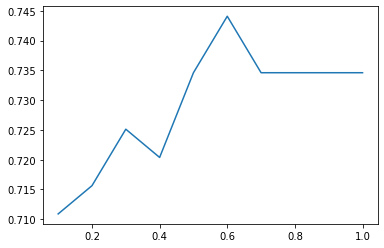

In [308]:
acc=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    svm = SVC(C=i)
    svm.fit(X_train,y_train)
    acc.append(accuracy_score(svm.predict(X_test),y_test))
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],acc)

### KNN

In [245]:
knn=KNeighborsClassifier(n_neighbors=7)

In [247]:
for i in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(i,accuracy_score(y_test,y_pred))

2 0.5974025974025974
3 0.7597402597402597
4 0.7467532467532467
5 0.7922077922077922
6 0.7857142857142857
7 0.8116883116883117
8 0.7922077922077922
9 0.7857142857142857
10 0.7922077922077922
11 0.7792207792207793
12 0.7857142857142857
13 0.7727272727272727
14 0.7792207792207793
15 0.7727272727272727
16 0.7792207792207793
17 0.7727272727272727
18 0.7857142857142857
19 0.7792207792207793


In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
RFE  = RandomForestClassifier(n_estimators=600,n_jobs=-1,oob_score=True,random_state=96,criterion='entropy')

In [250]:
acc=[]

In [251]:
for i in range(100,1001,100):
    RFE = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=96,criterion='entropy')
    RFE.fit(X_train,y_train)
    y_pred = RFE.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

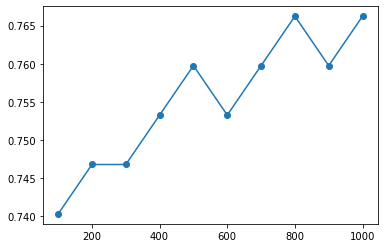

In [252]:
plt.plot(range(100,1001,100),acc,marker='o')

In [253]:
acc

[0.7402597402597403,
 0.7467532467532467,
 0.7467532467532467,
 0.7532467532467533,
 0.7597402597402597,
 0.7532467532467533,
 0.7597402597402597,
 0.7662337662337663,
 0.7597402597402597,
 0.7662337662337663]

In [254]:
from sklearn.model_selection import cross_val_score

In [260]:
cv = cross_val_score(RFE,X_s,y,scoring='accuracy')

In [263]:
cv

array([0.78861789, 0.74796748, 0.77235772, 0.82113821, 0.80327869])

### XG Boost

In [275]:
from pandas import MultiIndex, Int64Index
from xgboost import XGBClassifier

<ipython-input-275-a7e1e20705bc>:1: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [276]:
xgb = XGBClassifier()

In [277]:
xgb.fit(X_train,y_train)

C:\Users\Sathish\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [278]:
y_pred = xgb.predict(X_test)

In [279]:
accuracy_score(y_pred,y_test)

0.7272727272727273

### Max Voting

In [342]:
lr=LogisticRegression()
dt = DecisionTreeClassifier(random_state=96,max_depth=4,criterion='entropy')
knn=KNeighborsClassifier(n_neighbors=7)
svm = SVC()
rfe = RandomForestClassifier(n_estimators=600,n_jobs=-1,random_state=96,criterion='entropy')

In [343]:
from sklearn.ensemble import VotingClassifier

In [344]:
model = VotingClassifier(estimators=[('LR',lr),('DT',dt),('knn',knn),('svm',svm),('RF',rfe)],voting='hard')

In [345]:
cross_val_score(model,X_s,y,scoring='accuracy')

array([0.81300813, 0.77235772, 0.77235772, 0.82926829, 0.81147541])

In [346]:
model.fit(X_s,y)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     random_state=96)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svm', SVC()),
                             ('RF',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=600,
                                                     n_jobs=-1,
                                                     random_state=96))])

In [347]:
predictions = model.predict(Test)

In [348]:
giventest = pd.read_csv('test.csv')

In [349]:
sub = pd.read_csv('sample_submission.csv')

In [350]:
giventest['Loan_Status'] = predictions

In [351]:
answer = pd.DataFrame(giventest[['Loan_ID','Loan_Status']])

In [352]:
def decode(x):
    if x>0:
        return 'Y'
    else:
        return 'N'
    

In [353]:
answer['Loan_Status']=answer['Loan_Status'].apply(lambda x: decode(x))

In [354]:
answer['Loan_Status'].value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

In [357]:
answer.to_csv('Sathish_Sub.csv',index=False)